In [48]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install sklearn

You should consider upgrading via the 'python -m pip install --upgrade pip' command.


You should consider upgrading via the 'python -m pip install --upgrade pip' command.


You should consider upgrading via the 'python -m pip install --upgrade pip' command.


You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import *

In [2]:
data = pd.read_excel("IPG2211A2N.xls", skiprows=10);
data.columns = ["date","value"]
data['date'] = pd.to_datetime(data['date'])
data.head()

,date,value
0,1939-01-01,3.3842
1,1939-02-01,3.4100
2,1939-03-01,3.4875
3,1939-04-01,3.5133
4,1939-05-01,3.5133


/Users/ellu/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


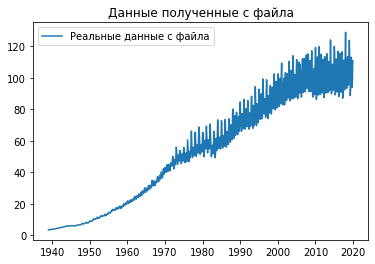

In [3]:
plt.plot(data['date'], data['value'])
plt.legend(['Реальные данные с файла'])
plt.title('Данные полученные с файла')
plt.show()

In [4]:
averege_data = pd.DataFrame(data.groupby(data['date'].dt.year).agg('mean'))
averege_data = averege_data.reset_index(level="date")
# Данные усредняються для того чтобы "обучить" полином именно на данных по годам. Так же это сгладит график,
# что улучшит резульаты подбора параметров

In [5]:
degree_of_polynomial = 3 # увеличивать номер полинома не приносит дивидендов, 
                         # поэтому остановился на квадратичном (степень считаем с 0)
fit = np.polyfit(averege_data['date'], averege_data['value'] ,degree_of_polynomial) 
predict = np.poly1d(fit)


In [6]:
predict_data = [predict(x) for x in averege_data['date']]


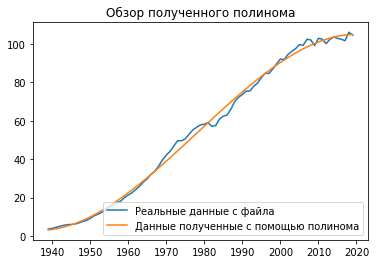

In [7]:
plt.plot(averege_data['date'], averege_data['value'])
plt.plot(averege_data['date'], predict_data)
plt.legend(('Реальные данные с файла', 'Данные полученные с помощью полинома'))
plt.title('Обзор полученного полинома')
plt.show()


In [8]:
print('Mean squared error: %.2f'
      % mean_squared_error(averege_data['value'], predict_data))

print('Mean absolute error: %.2f'
      % mean_absolute_error(averege_data['value'], predict_data))

print('Explained variance score: %.2f'
      % explained_variance_score(averege_data['value'], predict_data))

print('Mean squared log error: %.2f'
      % mean_squared_log_error(averege_data['value'], predict_data))

print('Median absolute error: %.2f'
      % median_absolute_error(averege_data['value'], predict_data))



Mean squared error: 4.54
Mean absolute error: 1.68
Explained variance score: 1.00
Mean squared log error: 0.00
Median absolute error: 1.22


In [9]:
# The coefficient of determination: 1 is perfect prediction
# Коэффициент детерминации для модели принимает значения от 0 до 1. 
# Чем ближе значение коэффициента к 1, тем сильнее зависимость. 
# При оценке регрессионных моделей это интерпретируется как соответствие модели данным. 
# Для приемлемых моделей предполагается, что коэффициент детерминации должен быть хотя бы не меньше 50 % 
# (в этом случае коэффициент множественной корреляции превышает по модулю 70 %). 
# Модели с коэффициентом детерминации выше 80 % можно признать достаточно хорошими 
# (коэффициент корреляции превышает 90 %). Значение коэффициента детерминации 1 означает 
# функциональную зависимость между переменными.
print('Coefficient of determination: %.2f'
      % r2_score(averege_data['value'], predict_data))

Coefficient of determination: 1.00


In [10]:
print('Ответ на полученное задание: %.2f' % predict(2020))

Ответ на полученное задание: 104.80


Хотелось бы объяснить почему не использовал корреляцию и/или автокореляцию. По числам которые были даны видно что зависимость практически линейная и постоянно увеличиваеться со временем и не вооруженным глазом. Также это не сильно повлияло бы на решение. 
Метрики показывает довольно хорошие показатели точности, что доказывает на работоспособность полинома к предсказыванию, хотя-бы на следующий год. 
Почему использовался именно полином, а не линейная регрессия или не дай бог нейронные сети? Потому что задание легкое и усложнять решение совсем не хотелось.
